**Importing important libraries that  are required to load and visualize the data set**

Here we are using the decision tree algorithm to predict tha target  value and building the ml model for it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv("teen_phone_addiction_dataset.csv")

In [3]:
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [5]:
df.isna().sum()

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [6]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [7]:
df.shape

(3000, 25)

Data visualization and finding the insights from the data

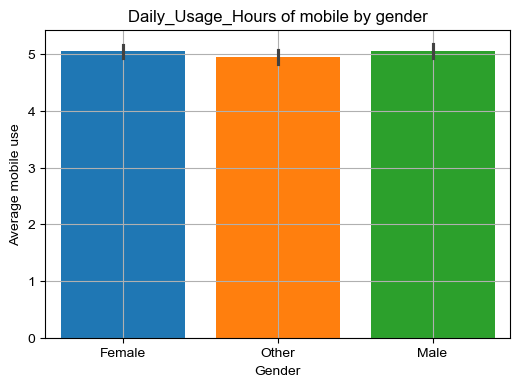

In [8]:
#Daily_Usage_Hours of mobile by gender

plt.figure(figsize=(6,4))
sns.barplot(data=df,x="Gender",y="Daily_Usage_Hours",estimator="mean",hue="Gender",saturation=100)
plt.title("Daily_Usage_Hours of mobile by gender")
plt.xlabel("Gender")
plt.ylabel("Average mobile use")
sns.set(style="darkgrid")
plt.grid()
plt.show()

In [9]:
#Check the correlation between Daily_Usage_Hours and Academic_Performance_Score

cor=df["Daily_Usage_Hours"].corr(df["Academic_Performance"])
print(cor)
print(f"The cor value is closser to the 0 value so  the correlation between Daily_Usage_Hours and Academic_Performance_Score is very high")

0.02134477925928378
The cor value is closser to the 0 value so  the correlation between Daily_Usage_Hours and Academic_Performance_Score is very high


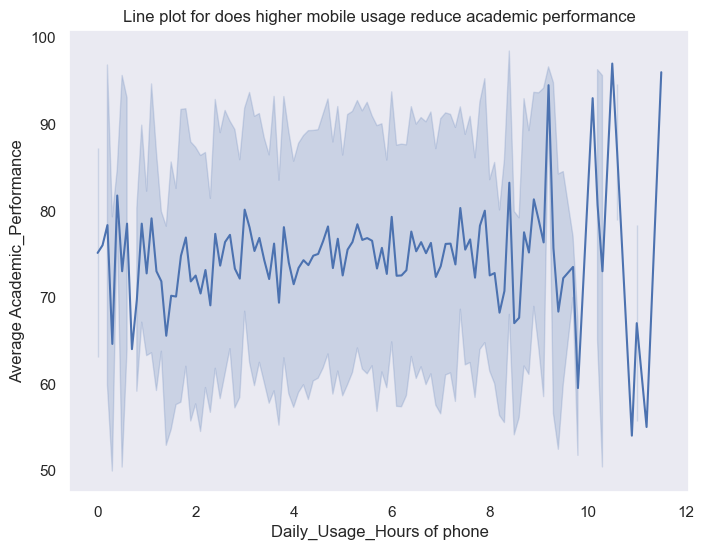

In [10]:
#Does higher mobile usage reduce academic performance?

plt.figure(figsize=(8,6))
sns.lineplot(data=df,x="Daily_Usage_Hours",y="Academic_Performance",errorbar="sd")
plt.title("Line plot for does higher mobile usage reduce academic performance")
sns.set(style="white")
plt.xlabel("Daily_Usage_Hours of phone")
plt.ylabel("Average Academic_Performance")
plt.grid()
plt.show()

In [11]:
#Which group has more variation (higher standard deviation)?

high_sd=df.groupby("Gender")["Daily_Usage_Hours"].std()
print(high_sd)

Gender
Female    1.943586
Male      1.996751
Other     1.927507
Name: Daily_Usage_Hours, dtype: float64


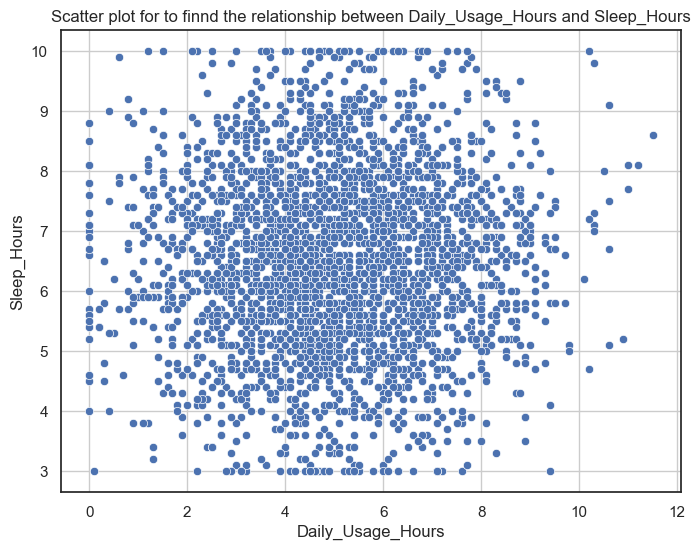

In [12]:
#Find the relationship between Daily_Usage_Hours and Sleep_Hours.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="Daily_Usage_Hours",y="Sleep_Hours")
plt.title("Scatter plot for to finnd the relationship between Daily_Usage_Hours and Sleep_Hours")
plt.xlabel("Daily_Usage_Hours")
plt.ylabel("Sleep_Hours")
plt.grid()
plt.show()

Number of the ouliers: 3000


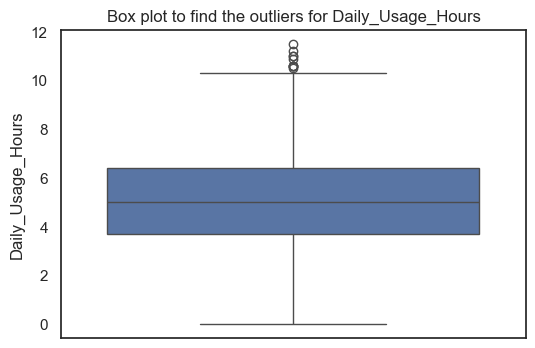

In [13]:
#Detect any outliers in Daily_Usage_Hours using the IQR method.

q1=df["Daily_Usage_Hours"].quantile(0.25)
q3=df["Daily_Usage_Hours"].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df["Daily_Usage_Hours"]>lower_bound)|(df["Daily_Usage_Hours"]<upper_bound)]
print("Number of the ouliers:",outliers.shape[0])

#OR================================================================================

plt.figure(figsize=(6,4))
sns.boxplot(data=df,y="Daily_Usage_Hours")
plt.title("Box plot to find the outliers for Daily_Usage_Hours")
plt.show()

Number of students use mobile for more than 10 hours per day:18


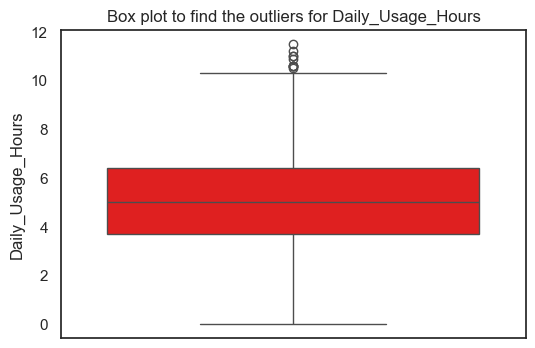

In [14]:
#How many students use mobile for more than 10 hours per day?

more_ten_H=df[df["Daily_Usage_Hours"]>10]
print(f"Number of students use mobile for more than 10 hours per day:{len(more_ten_H)}")

#OR================================================

plt.figure(figsize=(6,4))
sns.boxplot(data=df,y="Daily_Usage_Hours",color="red")
plt.title("Box plot to find the outliers for Daily_Usage_Hours")
plt.show()

In [15]:
#Calculate mean scores for both groups.

avg_score=df.groupby("Gender")["Academic_Performance"].mean()
print(f"The average score for both the group is:")
print(avg_score)

The average score for both the group is:
Gender
Female    74.700099
Male      74.712598
Other     75.446264
Name: Academic_Performance, dtype: float64


**Feature Extraction**

We have to apply some function for the target value to group them  in 3 chategory low,high and moderate

Creating a function to do this

In [16]:
def chategory(level):
  if 6<level<=10:
    return "High"
  elif 3<level<=6:
    return "Moderate"
  else:
    return "Low"

In [17]:
df["Addiction_Level"]=df["Addiction_Level"].apply(chategory)

In [18]:
df["Addiction_Level"].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [19]:
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,High
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,High
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,High
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,Moderate
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,High
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,High


In [20]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

Converting some important chategorical columns value into numeric value

Here we using label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

ln_en=LabelEncoder()

The columns to transform are

Gender,Phone_Usage_Purpose

In [22]:
df["Gender_encoded"]=ln_en.fit_transform(df["Gender"])
df["Phone_Usage_Purpose_encoded"]=ln_en.fit_transform(df["Phone_Usage_Purpose"])

Once columns are created drop the previous columns

In [23]:
df.drop(columns=["Gender","Phone_Usage_Purpose"],inplace=True)

Spliting the data columns into 2 parts for inputs and outputs

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Name                         3000 non-null   object 
 2   Age                          3000 non-null   int64  
 3   Location                     3000 non-null   object 
 4   School_Grade                 3000 non-null   object 
 5   Daily_Usage_Hours            3000 non-null   float64
 6   Sleep_Hours                  3000 non-null   float64
 7   Academic_Performance         3000 non-null   int64  
 8   Social_Interactions          3000 non-null   int64  
 9   Exercise_Hours               3000 non-null   float64
 10  Anxiety_Level                3000 non-null   int64  
 11  Depression_Level             3000 non-null   int64  
 12  Self_Esteem                  3000 non-null   int64  
 13  Parental_Control  

In [25]:
df.columns

Index(['ID', 'Name', 'Age', 'Location', 'School_Grade', 'Daily_Usage_Hours',
       'Sleep_Hours', 'Academic_Performance', 'Social_Interactions',
       'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem',
       'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day',
       'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming',
       'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level', 'Gender_encoded', 'Phone_Usage_Purpose_encoded'],
      dtype='object')

In [26]:
#for input
x=df[['Age','Daily_Usage_Hours',
       'Sleep_Hours', 'Academic_Performance', 'Social_Interactions',
       'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem',
       'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day',
       'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming',
       'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours','Gender_encoded', 'Phone_Usage_Purpose_encoded']]

#for ouput or target value
y=df['Addiction_Level']

Determining the target value is balnced or un balanced

for the data it is unbalanced

In [27]:
df["Addiction_Level"].value_counts()

Addiction_Level
High        2765
Moderate     221
Low           14
Name: count, dtype: int64

for to  make the target value balanced we use the over sampling method

In [28]:
from imblearn.over_sampling import RandomOverSampler

re_smpl=RandomOverSampler()

In [29]:
#for input

x_resample,y_resample=re_smpl.fit_resample(x,y)

In [30]:
#Now the target value is balansed
y_resample.value_counts()

Addiction_Level
High        2765
Moderate    2765
Low         2765
Name: count, dtype: int64

Spliting the data for training and testing parts

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=2)

Model calling

In [32]:
model=DecisionTreeClassifier(max_depth=5)

Training the model on input data

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

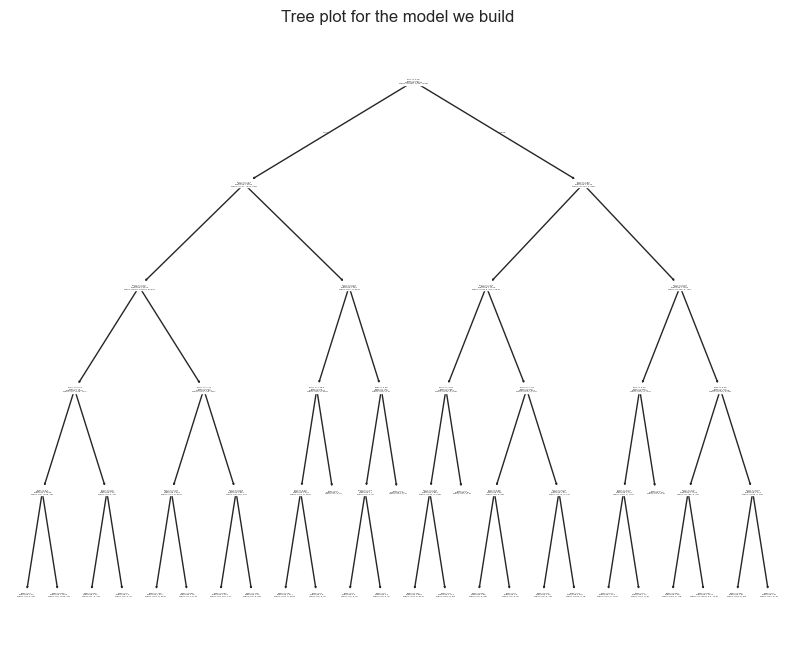

In [34]:
plt.figure(figsize=(10,8))
plot_tree(model)
plt.title("Tree plot for the model we build")
plt.show()

Predictig model output

In [35]:
y_pred=model.predict(x_test)

Calculating predicted model accuracy

In [36]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.94      0.87      0.90       860
         Low       0.96      1.00      0.98       820
    Moderate       0.87      0.89      0.88       809

    accuracy                           0.92      2489
   macro avg       0.92      0.92      0.92      2489
weighted avg       0.92      0.92      0.92      2489

0.9220570510245079


In [37]:
print(classification_report(y_train, model.predict(x_train)))
print(accuracy_score(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

        High       0.93      0.89      0.91      1905
         Low       0.97      1.00      0.99      1945
    Moderate       0.90      0.91      0.90      1956

    accuracy                           0.93      5806
   macro avg       0.93      0.93      0.93      5806
weighted avg       0.93      0.93      0.93      5806

0.9330003444712367


Model loading and dumping

In [38]:
import joblib

joblib.dump(model,"model.pkl")

['model.pkl']

In [39]:
joblib.load("model.pkl")

DecisionTreeClassifier(max_depth=5)

In [40]:
x_train

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Gender_encoded,Phone_Usage_Purpose_encoded
798,13,4.3,7.4,72,8,0.6,3,4,9,0,1.5,32,16,4.1,0.9,1.0,3,8.0,2,3
2203,17,4.8,7.6,61,3,0.0,8,1,5,0,1.1,149,13,4.1,2.4,1.5,7,9.1,2,0
1426,15,6.4,5.7,50,10,0.3,5,10,4,1,0.8,117,18,3.1,2.8,2.0,1,1.9,0,3
4015,13,1.3,7.1,73,4,1.0,7,1,8,0,2.1,38,11,1.6,0.7,2.3,5,8.8,2,1
3721,14,2.5,9.8,59,4,1.7,3,6,6,0,0.9,46,9,1.6,0.9,0.8,6,3.3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,13,3.9,6.2,83,10,0.1,3,3,10,1,0.9,93,5,1.5,1.5,0.4,4,7.4,1,0
2514,16,6.6,5.6,96,8,1.0,2,6,4,0,1.1,55,18,2.7,0.9,1.9,10,1.8,0,2
6637,16,3.3,6.7,79,3,0.9,4,3,6,0,1.2,82,7,1.1,0.7,0.9,8,7.0,0,2
2575,14,7.4,7.7,94,6,0.7,9,2,10,0,0.2,40,15,1.5,0.5,0.7,6,2.6,1,2


In [41]:
op=model.predict([[13,4.5,7.4,72,8,0.6,3,4,9,0,1.5,32,16,4.1,0.9,1.0,3,8.0,2,3]])
print("predicted output is:",op)

predicted output is: ['High']


C:\Users\Varun\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
